In [1]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    
    for epoch in range(nb_epochs):
        
        # H(x) 계산
        prediction = model(x_train)
        
        # Cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # Cost 로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [2]:
for X, Y in data_loader :
    X = X.view(-1, 28 * 28)

NameError: name 'data_loader' is not defined

In [3]:
import torch
import torchvision.datasets as dsets
from torchvision import transforms

In [4]:
mnist_train = dsets.MNIST(root="MNIST_data/", train=True, 
                          transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False,
                         transform=transforms.ToTensor(), download=True)
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=100,
                                          shuffle=True, drop_last=True)

In [5]:
for epoch in range(training_epochs):
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)

NameError: name 'training_epochs' is not defined

In [10]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")

# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

#parameters
training_epochs = 15
batch_size = 100

# define cost/Loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) # Softmax is iternally computed
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch
    
    print("Epoch: ", "%04d" % (epoch+1), "cost =", "{:.9f}".format(avg_cost))

Epoch:  0001 cost = 0.534756005
Epoch:  0002 cost = 0.359174013
Epoch:  0003 cost = 0.331201941
Epoch:  0004 cost = 0.316266686
Epoch:  0005 cost = 0.307040870
Epoch:  0006 cost = 0.299912900
Epoch:  0007 cost = 0.294732571
Epoch:  0008 cost = 0.290678203
Epoch:  0009 cost = 0.287582785
Epoch:  0010 cost = 0.284341097
Epoch:  0011 cost = 0.282109201
Epoch:  0012 cost = 0.279737592
Epoch:  0013 cost = 0.277751386
Epoch:  0014 cost = 0.275944412
Epoch:  0015 cost = 0.274412394


In [13]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

Accuracy:  0.8828999996185303


Label:  1
Prediction:  8


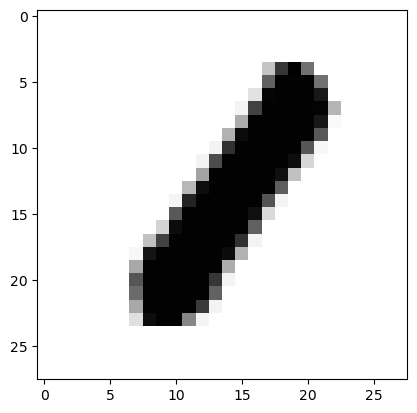

In [23]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print("Label: ", Y_single_data.item())
single_prediction = linear(X_single_data)
print("Prediction: ", torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap="Greys", interpolation="nearest")
plt.show()